## Import the required Libraries

In [1]:
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

Using TensorFlow backend.


## Initiate the Model

In [2]:
classifier=ResNet50()
print(classifier.summary())

Instructions for updating:
Colocations handled automatically by placer.
102858752/102853048 [==============================] - 126s 1us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         co

## Load the Image

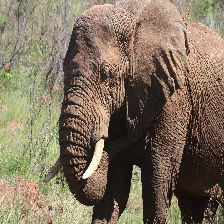

In [3]:
new_image= image.load_img('../Data/Prediction/test_image_2.jpeg', target_size=(224, 224))
new_image

## Change the image to array

In [4]:
transformed_image= image.img_to_array(new_image)
transformed_image.shape


(224, 224, 3)

## Expand the tranfromed image with 4th Dimension

In [5]:
transformed_image=np.expand_dims(transformed_image,axis=0)
transformed_image.shape

(1, 224, 224, 3)

## Preprocess the Image

In [6]:
transformed_image=preprocess_input(transformed_image)
transformed_image

array([[[[ 3.3060997e+01,  4.4221001e+01,  3.7320000e+01],
         [ 4.0060997e+01,  6.0221001e+01,  4.9320000e+01],
         [ 4.9060997e+01,  7.2221001e+01,  5.9320000e+01],
         ...,
         [-1.5939003e+01, -1.6778999e+01, -1.7680000e+01],
         [-3.0939003e+01, -2.6778999e+01, -3.6680000e+01],
         [-1.3939003e+01, -1.5778999e+01, -1.4680000e+01]],

        [[ 3.9060997e+01,  4.7221001e+01,  4.2320000e+01],
         [ 6.0060997e+01,  7.1221001e+01,  6.4320000e+01],
         [ 5.1060997e+01,  6.5221001e+01,  5.4320000e+01],
         ...,
         [-1.0939003e+01, -1.4778999e+01, -7.6800003e+00],
         [-1.7939003e+01, -2.2778999e+01, -1.6680000e+01],
         [ 4.0609970e+00, -7.7899933e-01,  5.3199997e+00]],

        [[ 3.2060997e+01,  3.3221001e+01,  2.4320000e+01],
         [ 5.1060997e+01,  4.9221001e+01,  3.9320000e+01],
         [ 5.3060997e+01,  5.9221001e+01,  4.9320000e+01],
         ...,
         [-1.1939003e+01, -6.7789993e+00, -2.6800003e+00],
         [

## Create a predictor variable

In [7]:
y_pred= classifier.predict(transformed_image)
y_pred

array([[6.47166898e-09, 5.24945865e-10, 6.81785384e-09, 3.76043952e-09,
        8.09678324e-10, 4.43612347e-09, 2.52210319e-09, 3.14416084e-08,
        1.68235970e-09, 3.78534963e-07, 1.02361142e-09, 8.78262407e-10,
        4.49590143e-10, 3.34538092e-10, 1.86001478e-10, 1.04334041e-09,
        4.67363370e-10, 5.99290895e-10, 3.71567932e-09, 3.22463029e-10,
        5.51322377e-10, 7.72893074e-08, 8.40051140e-09, 4.27206203e-07,
        8.29459026e-08, 3.05196624e-09, 3.99983779e-09, 1.44998058e-09,
        1.12231247e-09, 8.98059793e-10, 8.34464609e-10, 6.46340093e-10,
        4.60242178e-10, 1.75170545e-08, 3.93514767e-08, 4.50083704e-09,
        1.30180666e-08, 4.43029746e-09, 1.37959741e-08, 1.68013429e-07,
        4.89833951e-09, 1.07147438e-08, 5.63875275e-08, 4.64373130e-07,
        1.90195504e-08, 1.82669638e-07, 3.27756244e-09, 1.62337557e-08,
        2.34491636e-05, 7.45615864e-07, 3.42258879e-08, 2.30582900e-05,
        2.40527709e-09, 3.16206883e-09, 1.35134810e-08, 5.856018

## Check the shape of the array

In [8]:
y_pred.shape

(1, 1000)

## Make the predictions

In [9]:
from keras.applications.resnet50 import decode_predictions
decode_predictions(y_pred,top=5)

[[('n02504458', 'African_elephant', 0.6968602),
  ('n01871265', 'tusker', 0.26584822),
  ('n02504013', 'Indian_elephant', 0.03676174),
  ('n02410509', 'bison', 0.00026724974),
  ('n02412080', 'ram', 4.000693e-05)]]

# Make the predictions in readable form

In [10]:
label = decode_predictions(y_pred)
# retrieve the most likely result, i.e. highest probability
decoded_label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (decoded_label[1], decoded_label[2]*100 ))

African_elephant (69.69%)
